Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
bb_case = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [5]:
bb_case.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
bb_case.shape

(30, 17)

The dataset has 30 rows and 17 columns.

In [7]:
bb_case.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
bb_case.rename(columns = {'W':'Win', 'R':'Runs', 'AB':'At Bats', 'H':'Hits', '2B':'Doubles', '3B':'Triples','HR':'Homeruns', 'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen Bases', 'RA':'Runs Allowed', 'ER':'Earned Runs', 'ERA':'Earned Run Average', 'CG':'Complete Games', 'SHO':'Shutouts', 'SV':'Saves', 'E':'Errors'}, inplace=True)

In [10]:
bb_case.columns

Index(['Win', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average', 'Complete Games', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

In [11]:
bb_case.head()

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Renamed all the columns with their full forms.

In [12]:
bb_case.isnull().sum()

Win                   0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

No null values in the dataframe

In [13]:
bb_case.dtypes

Win                     int64
Runs                    int64
At Bats                 int64
Hits                    int64
Doubles                 int64
Triples                 int64
Homeruns                int64
Walks                   int64
Strikeouts              int64
Stolen Bases            int64
Runs Allowed            int64
Earned Runs             int64
Earned Run Average    float64
Complete Games          int64
Shutouts                int64
Saves                   int64
Errors                  int64
dtype: object

All the data are integer type.

In [14]:
bb_case.skew()

Win                   0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

Keeping +/- 0.5 as the range for skewness, here all the columns lie within the range except Runs,Hits, complete games, saves, strikeouts and errors column.

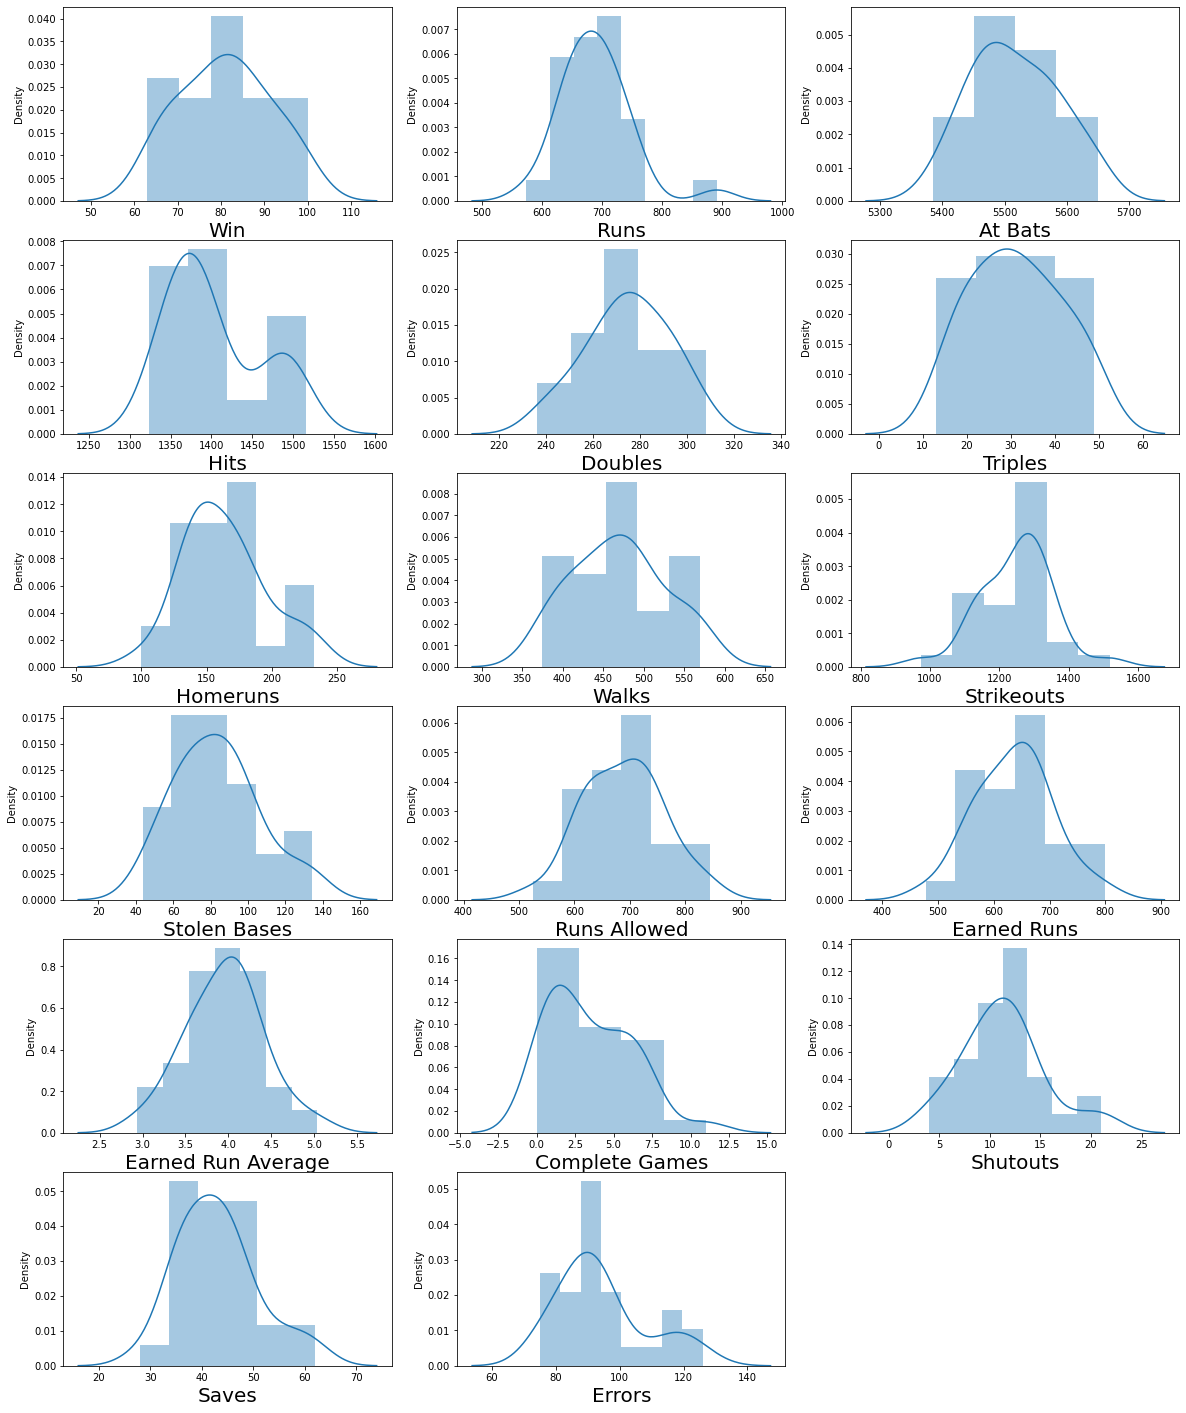

In [18]:
plt.figure(figsize = (20,25), facecolor='white')
plotnumber = 1

for column in bb_case:
    if plotnumber<=18:
       ax = plt.subplot(6,3, plotnumber)
       sns.distplot(bb_case[column])
       plt.xlabel(column, fontsize =20)
    
    plotnumber+=1
    
plt.show()

Runs,Hits, complete games, saves, strikeouts and errors column are skewed

In [19]:
bb_case.corr()

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Win,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


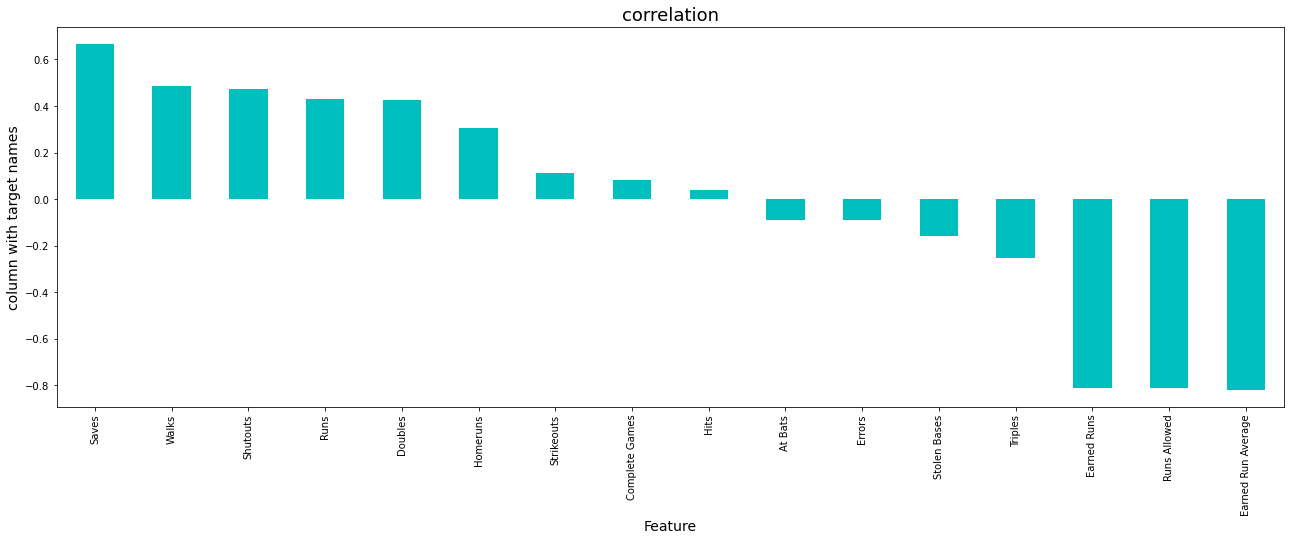

In [20]:
plt.figure(figsize=(22,7))
bb_case.corr()['Win'].sort_values(ascending=False).drop(['Win']).plot(kind='bar', color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('column with target names', fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

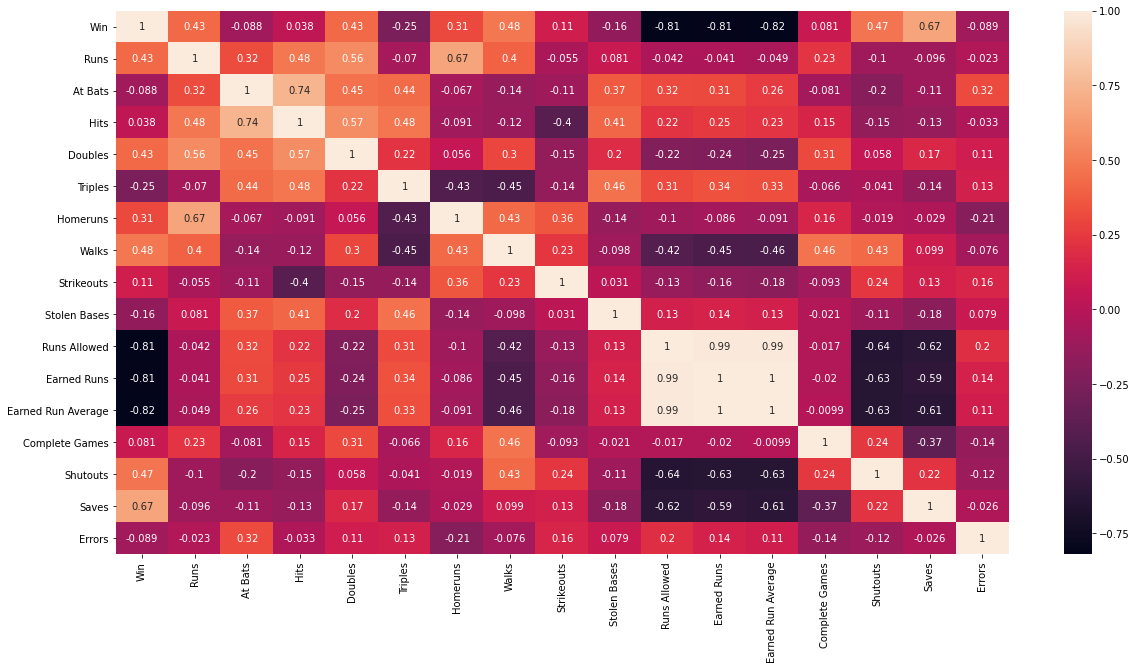

In [21]:
plt.figure(figsize= (20,10))
sns.heatmap(bb_case.corr(), annot=True)
plt.show()

Earned Run Average, Earned Runs and Runs Allowed are all equally correlated. So, I can drop any two columns.
Preferring to drop Earned Runs and Runs Allowed.
Also, as win is our target column, we can see that colums like Saves, Runs and Strikeouts have very good correlation with the target whereas columns like Errors, complete games and hits have a bad correlation with the target column.So, if I apply transformation methods to good corelation columns, then their patterns will also change thereby their correlation values will also change.

In [22]:
bb_case =bb_case.drop(['Earned Runs', 'Runs Allowed'], axis = 1)

In [23]:
bb_case.columns

Index(['Win', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Earned Run Average',
       'Complete Games', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

In [37]:
bb_case['Errors'] = np.sqrt(bb_case['Errors'])

In [38]:
bb_case['Complete Games'] = np.sqrt(bb_case['Complete Games'])

In [39]:
bb_case['Hits'] = np.sqrt(bb_case['Hits'])

In [41]:
bb_case.skew()

Win                   0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.649567
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Earned Run Average    0.053331
Complete Games       -0.311476
Shutouts              0.565790
Saves                 0.657524
Errors                0.763487
dtype: float64

We are able to remove skewness from those three columns.

In [44]:
bb_case.columns

Index(['Win', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Earned Run Average',
       'Complete Games', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

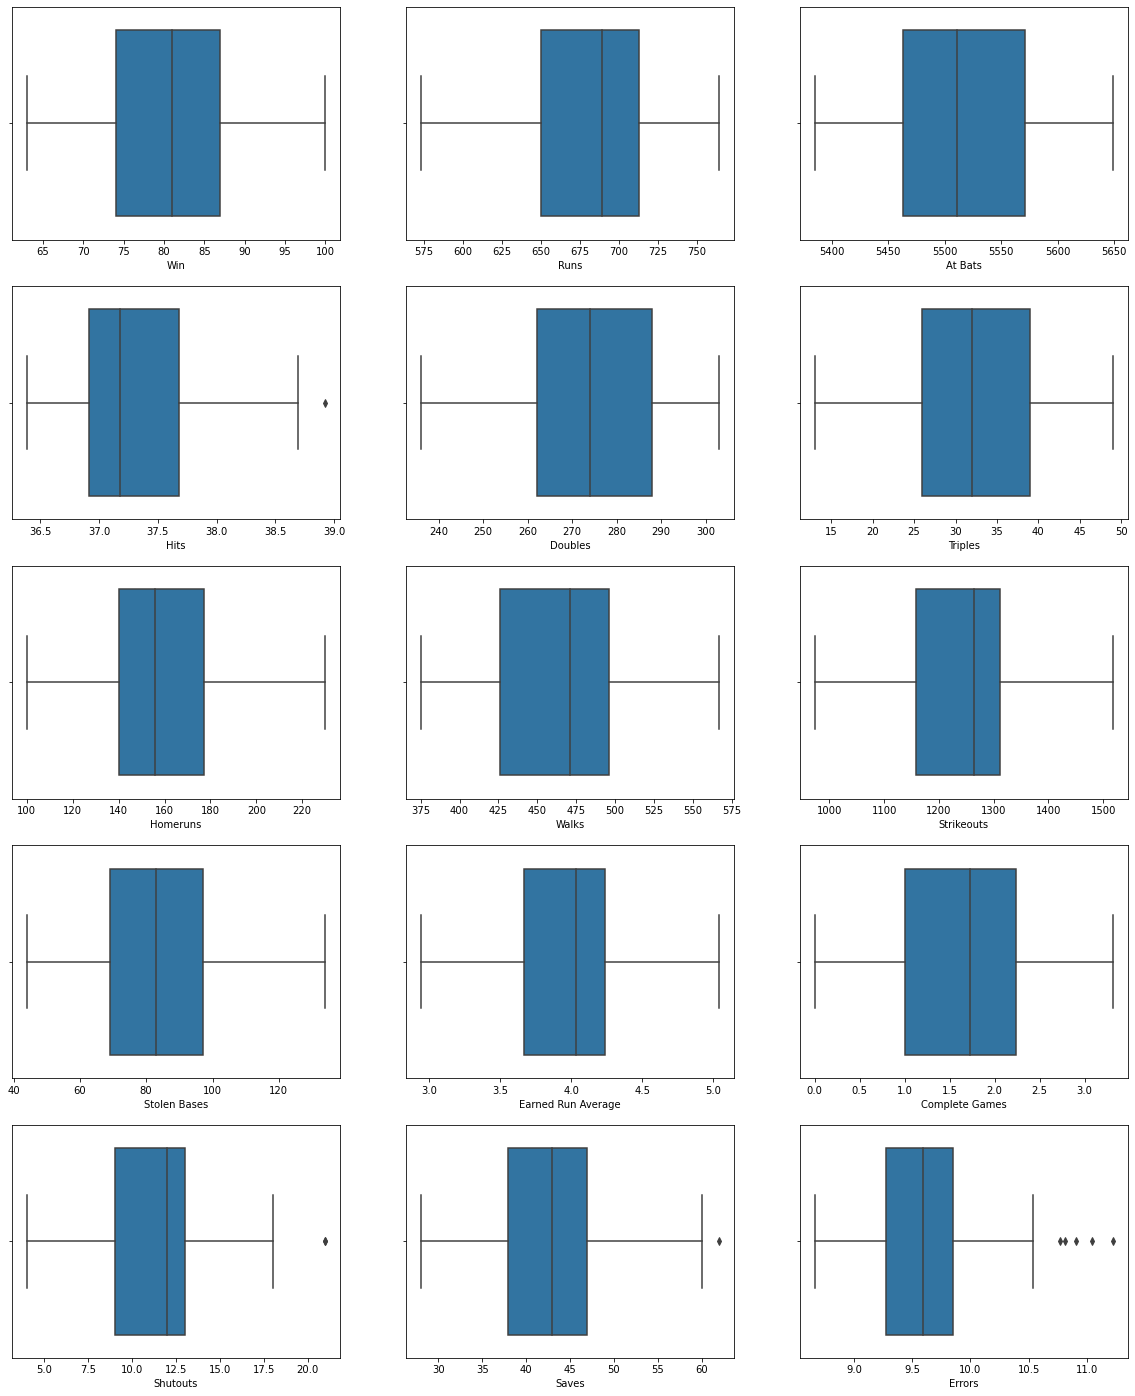

In [77]:
plt.figure(figsize = (20,30), facecolor='white')
plotnumber = 1

for column in bb_case:
    if plotnumber<=18:
       ax = plt.subplot(6,3, plotnumber)
       sns.boxplot(bb_case[column])
       plt.xlabel(column, fontsize =10)
    
    plotnumber+=1
    
plt.show()

Runs, Earned Run Average, Shutouts, Saves and Errors columns have outliers.

In [70]:
from scipy.stats import zscore

In [71]:
z_score = zscore(bb_case[['Runs', 'Earned Run Average', 'Shutouts', 'Saves', 'Errors']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis =1)
bb_case = bb_case[filtering_entry]
bb_case.describe()

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,37.421365,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,3.961724,1.626330,11.344828,43.379310,9.698586
std,10.384006,45.357040,71.701076,0.746464,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,0.461148,0.851396,4.185655,7.816712,0.711778
min,63.000000,573.000000,5385.000000,36.386811,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,2.940000,0.000000,4.000000,28.000000,8.660254
25%,74.000000,650.000000,5463.000000,36.918830,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,3.670000,1.000000,9.000000,38.000000,9.273618
50%,81.000000,689.000000,5511.000000,37.175261,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,4.030000,1.732051,12.000000,43.000000,9.591663
75%,87.000000,713.000000,5571.000000,37.682887,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,4.240000,2.236068,13.000000,47.000000,9.848858
max,100.000000,764.000000,5649.000000,38.923001,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,5.040000,3.316625,21.000000,62.000000,11.224972


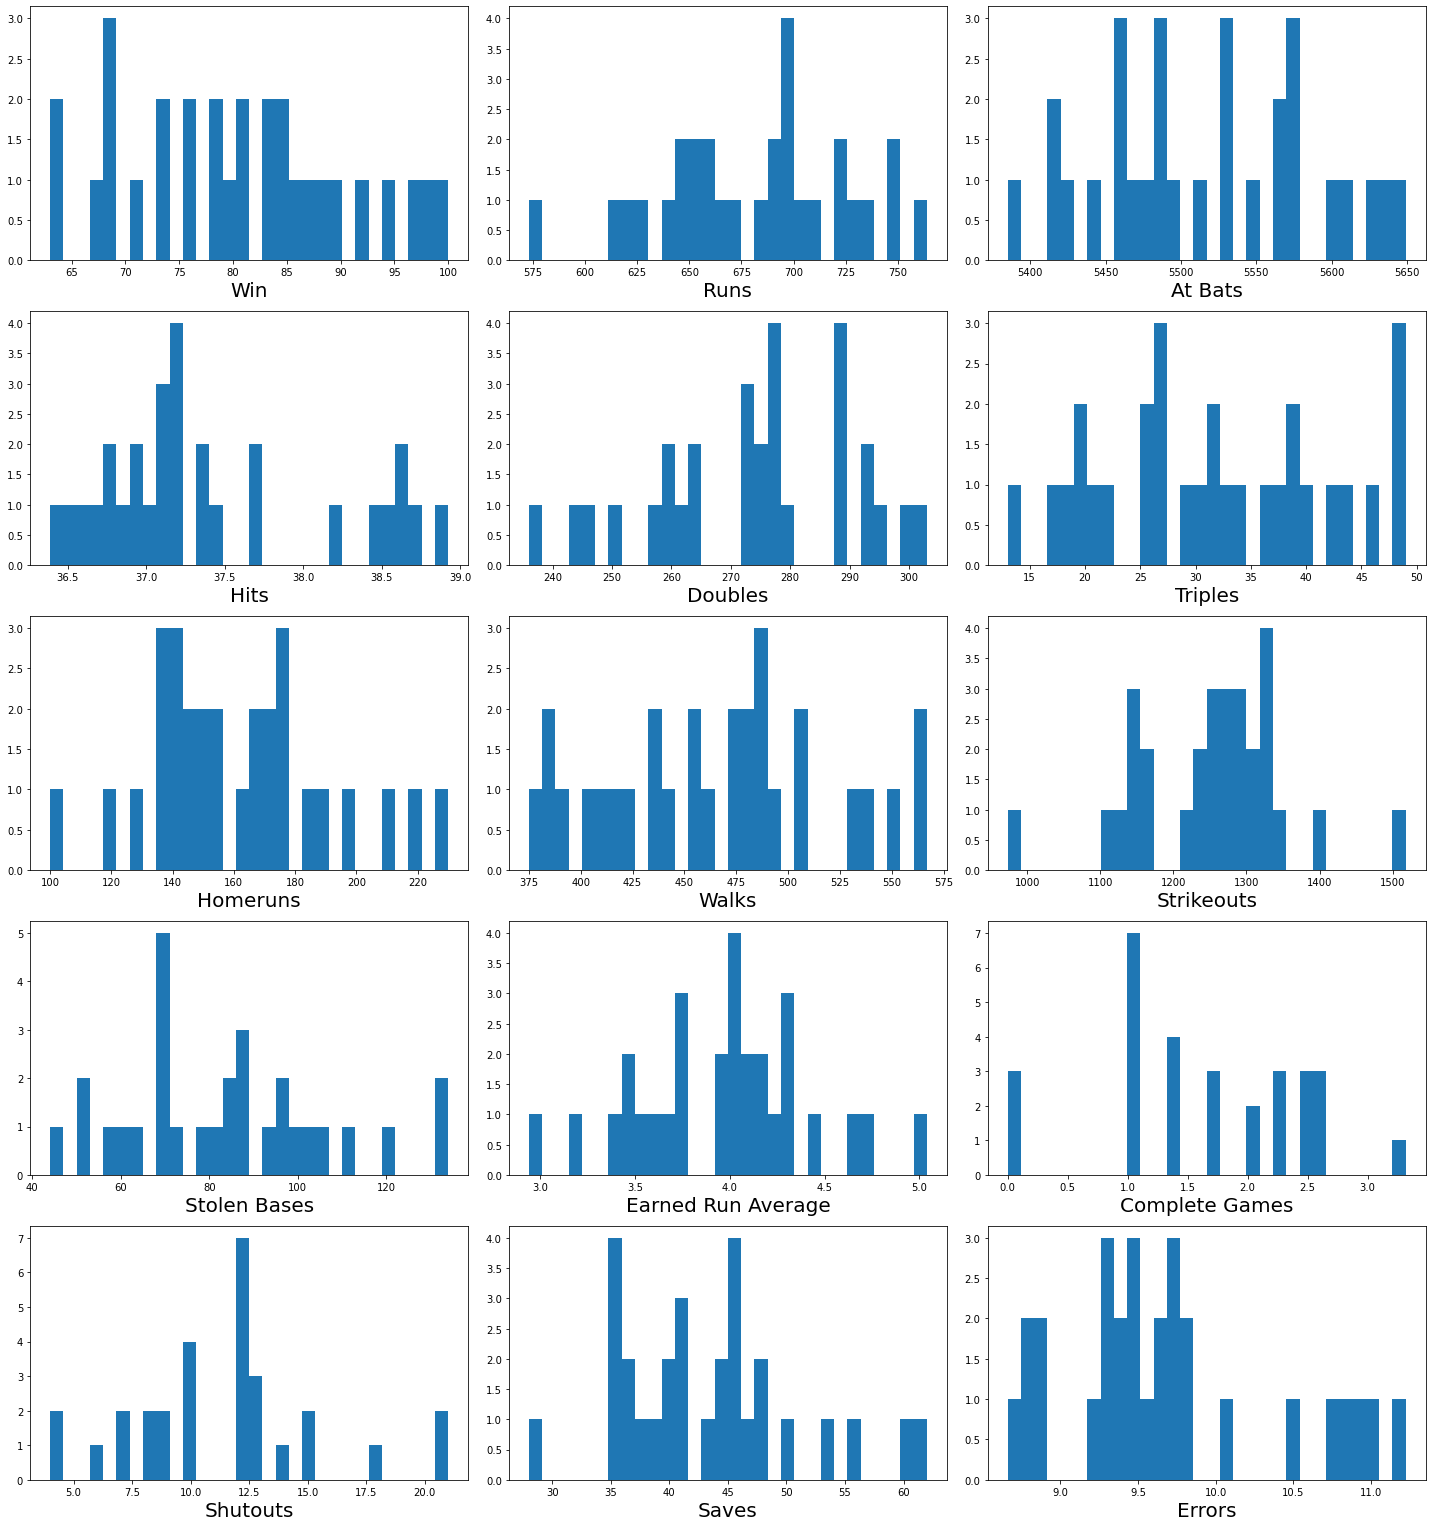

In [72]:
plt.figure(figsize = (20,25), facecolor='white')
plotnumber = 1

for column in bb_case:
    if plotnumber<=18:
       ax = plt.subplot(6,3, plotnumber)
       plt.hist(bb_case[column], bins = 30)
       plt.xlabel(column, fontsize =20)
    
    plotnumber+=1

plt.tight_layout()
plt.show()

Now we are able to remove the outliers to some extent.

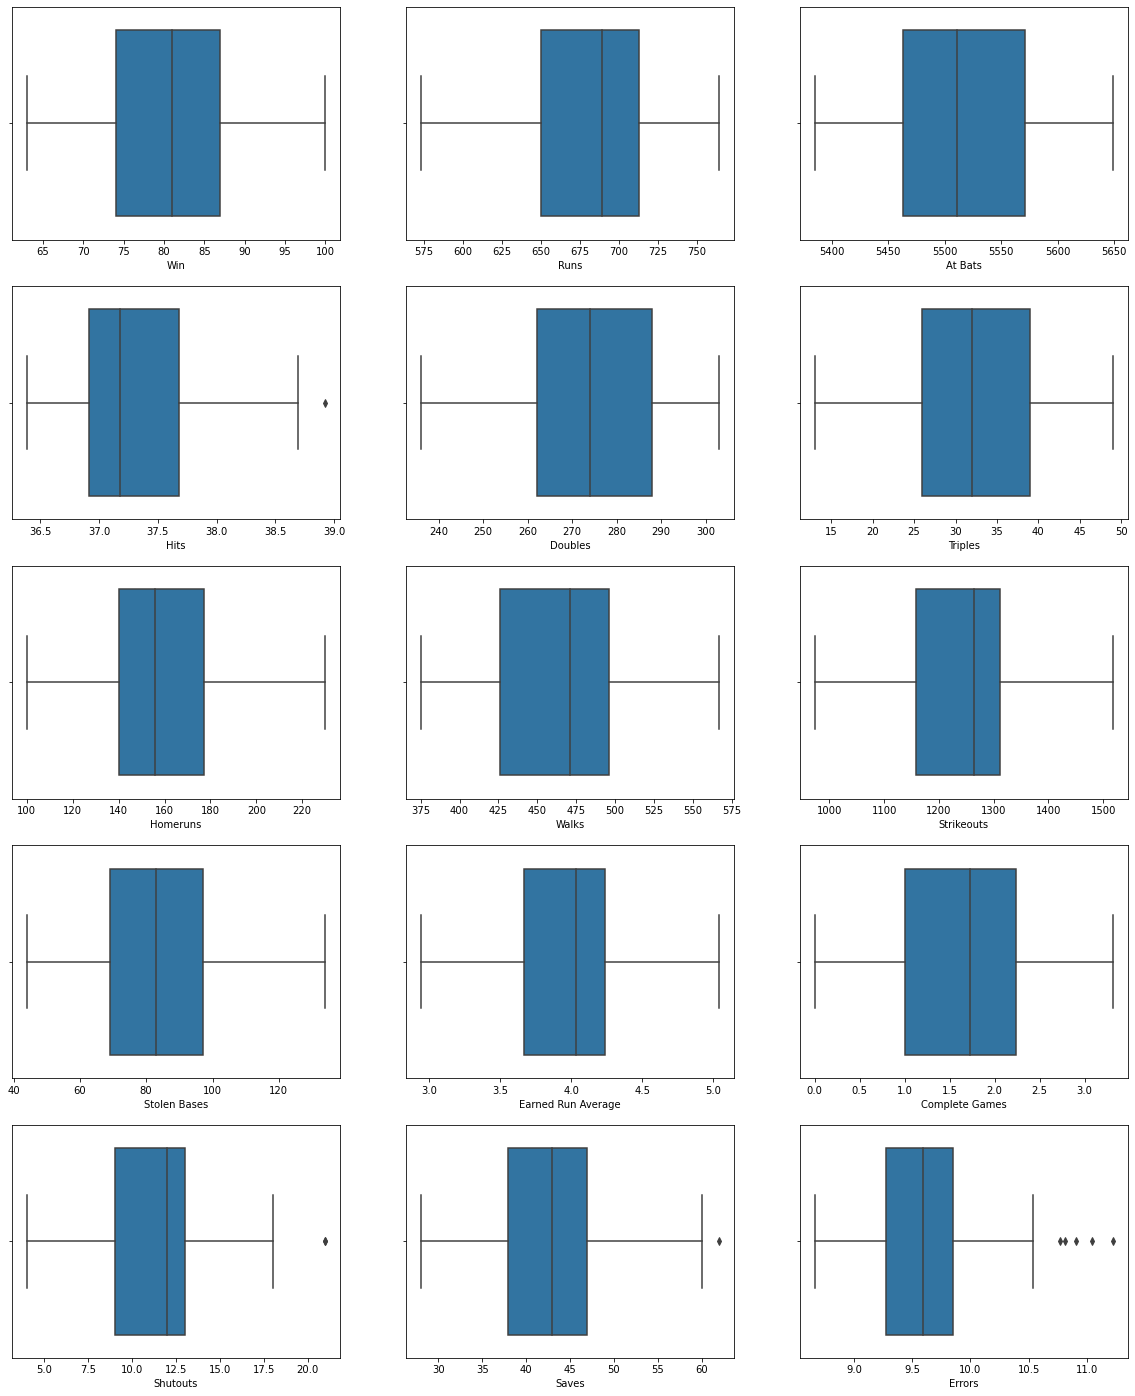

In [78]:
plt.figure(figsize = (20,30), facecolor='white')
plotnumber = 1

for column in bb_case:
    if plotnumber<=18:
       ax = plt.subplot(6,3, plotnumber)
       sns.boxplot(bb_case[column])
       plt.xlabel(column, fontsize =10)
    
    plotnumber+=1
    
plt.show()

Still we can see outliers, so applying quantile technique.

In [79]:
q = bb_case['Hits'].quantile(0.99)
bb_case = bb_case[bb_case['Hits']<q]

In [82]:
q = bb_case['Shutouts'].quantile(0.99)
bb_case = bb_case[bb_case['Shutouts']<q]

In [86]:
q = bb_case['Saves'].quantile(0.98)
bb_case = bb_case[bb_case['Saves']<q]

In [87]:
q = bb_case['Errors'].quantile(0.98)
bb_case = bb_case[bb_case['Errors']<q]

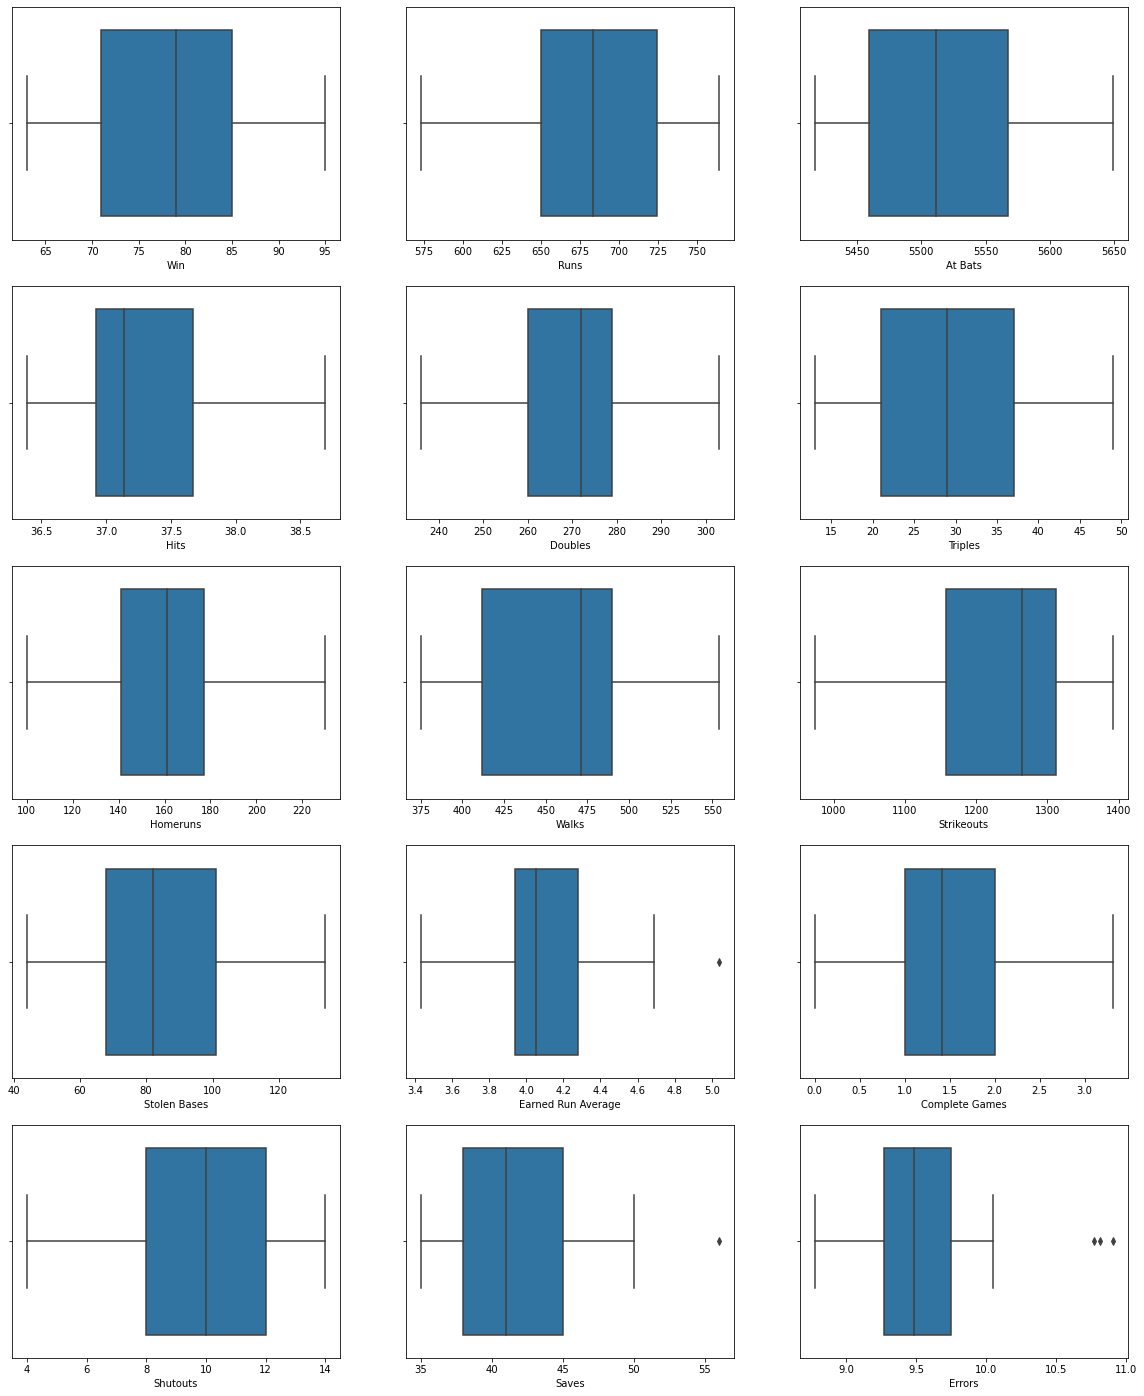

In [88]:
plt.figure(figsize = (20,30), facecolor='white')
plotnumber = 1

for column in bb_case:
    if plotnumber<=18:
       ax = plt.subplot(6,3, plotnumber)
       sns.boxplot(bb_case[column])
       plt.xlabel(column, fontsize =10)
    
    plotnumber+=1
    
plt.show()

In [89]:
y  = data['Win']
X  = data.drop('Win', axis=1)

In [90]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
X_scaled

array([[ 0.61907797,  0.84773126,  1.65659155,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.50695519,
        -0.29205567, -0.81462859,  1.67160651],
       [ 0.13443166, -0.71109353, -0.97619984,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.25459752,
        -0.29205567,  0.1728    ,  0.24987932],
       [-0.33290586, -1.1152333 , -0.14308234,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.64134684,
         1.96563341, -0.32091429, -0.65485616],
       [-1.14641931,  0.24152162, -0.39516612, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.05301004,
         1.16947341, -0.56777144, -0.78410408],
       [ 0.01327008,  1.28073815,  1.96774325,  0.80189192,  1.72234737,
        -0.40377019, -0.25136033,  0.10586628, -0.02228984,  1.53131824,
         1.16947341,  0.1728    , -1.04259994],
       [ 3.50964704, -0.104883

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
vif = pd.DataFrame()
vif['vif']= [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,7.911547,Runs
1,2.922904,At Bats
2,5.595220,Hits
3,3.841253,Doubles
4,3.033780,Triples
5,5.466432,Homeruns
6,3.467056,Walks
7,2.107541,Strikeouts
8,1.751250,Stolen Bases
9,5.042150,Earned Run Average


In [167]:
from sklearn.metrics import r2_score

In [151]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = 345)
y_train.head()

18    68
13    76
0     95
8     80
12    85
Name: Win, dtype: int64

In [152]:
log_reg = LinearRegression()

log_reg.fit(x_train,y_train)

LinearRegression()

In [153]:
y_pred = log_reg.predict(x_test)

In [154]:
print(r2_score(y_test,y_pred))

0.816317162497895


In [155]:
from sklearn.linear_model import Lasso,LassoCV
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(normalize=True)

In [156]:
alpha = lasscv.alpha_

In [157]:
alpha

0.22303889946992003

In [158]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.22303889946992003)

In [159]:
lasso_reg.score(x_test,y_test)

0.8666976985011666

In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [161]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [162]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.8802756244888483

After using regularization technique, I was able to increase score for my model from 81% to 88%. So, i will stick to Linear Regeression model.

In [163]:
cv_score=cross_val_score(ls,X,y,cv=5)
cv_mean=cv_score.mean

In [164]:
cv_mean()

0.3178209843285412

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'], 'max_features': ["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [166]:
rf= RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore =  cross_val_score(rf,X,y,cv=5)
rfc=  rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 score: 34.708220064724905
Cross Val Score: -58.87654670992447


Since, my LinearRegression model after regularization is giving accuracy and cross validation as 88%. It shows the model is. performimg well.

In [120]:
import pickle
filename = 'baseball.pkl'
pickle.dump(lss, open(filename, 'wb'))